# Pemorgraman Open Source M12

# Plot dan Grafik dasar

### Matplotlib

Matplotlib adalah library Python yang digunakan untuk visualisasi data dalam berbagai bentuk seperti grafik garis, histogram, scatter plot, dll. Dengan Matplotlib, kita dapat menghasilkan plot dengan kualitas tinggi dalam berbagai format dan dapat digunakan di banyak platform.

#### Instalasi dan Import

Matplotlib dapat diinstal menggunakan pip dan dipanggil menggunakan import:

In [34]:
#!pip install matplotlib
import matplotlib.pyplot as plt

Beberapa jupyter akan terjadi error ketika memanggil plt untuk membuat grafik, solusinya adalah menambahkan *inline* dalam importnya 


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## Seaborn
Seaborn adalah library Python yang berfungsi untuk mempermudah pembuatan visualisasi yang informatif dan menarik. Berdasarkan Matplotlib, Seaborn memudahkan pembuatan heatmap, pairplot, dan banyak plot lainnya yang sulit untuk dibuat hanya dengan Matplotlib.

### Instalasi dan Import

Seaborn dapat diinstal menggunakan pip dan di import dengan panggilan sns:

In [36]:
#!pip install seaborn
import seaborn as sns

Untuk mecobanya, kita akan menggunakan data movie_review

In [3]:
import pandas as pd

In [10]:
data = pd.read_csv("movie_sample_dataset.csv")
df = data

In [11]:
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 91 non-null     float64
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                95 non-null     float64
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.2+ KB


In [17]:
df = df.dropna(axis=0)
# Axis=0 artinya dia akan menghapus yang barisnya kosong

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 69 non-null     object 
 1   director_name         69 non-null     object 
 2   duration              69 non-null     int64  
 3   gross                 69 non-null     float64
 4   genres                69 non-null     object 
 5   movie_title           69 non-null     object 
 6   title_year            69 non-null     int64  
 7   language              69 non-null     object 
 8   country               69 non-null     object 
 9   budget                69 non-null     float64
 10  imdb_score            69 non-null     float64
 11  actors                69 non-null     object 
 12  movie_facebook_likes  69 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 7.5+ KB


In [23]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
non_numerical_columns = df.select_dtypes(include="object").columns

In [24]:
numerical_columns, non_numerical_columns

(Index(['duration', 'gross', 'title_year', 'budget', 'imdb_score',
        'movie_facebook_likes'],
       dtype='object'),
 Index(['color', 'director_name', 'genres', 'movie_title', 'language',
        'country', 'actors'],
       dtype='object'))

#### Membuat Barchart Sederhana
Matplotlib itu hanya digunakan untuk memunculkan grafiknya saja, sehingga untuk membuat sebuah barchart dengan perhitungan tertentu, anda harus menghitungnya terlebih dahulu. Disini kita contohkan menggunakan variabel gross dengan aggregat berdasarkan country, dan dihitung berdasarkan mean nya.

In [47]:
movie_gross = df.groupby("country").agg({"gross":"mean"})
movie_gross.reset_index(inplace=True)
movie_gross

,country,gross
0,Australia,144812796.0
1,Czech Republic,1206135.0
2,France,41229.0
3,New Zealand,255108370.0
4,UK,157855594.5
5,USA,164426722.0
6,United States,233914986.0
7,usa,113225604.0


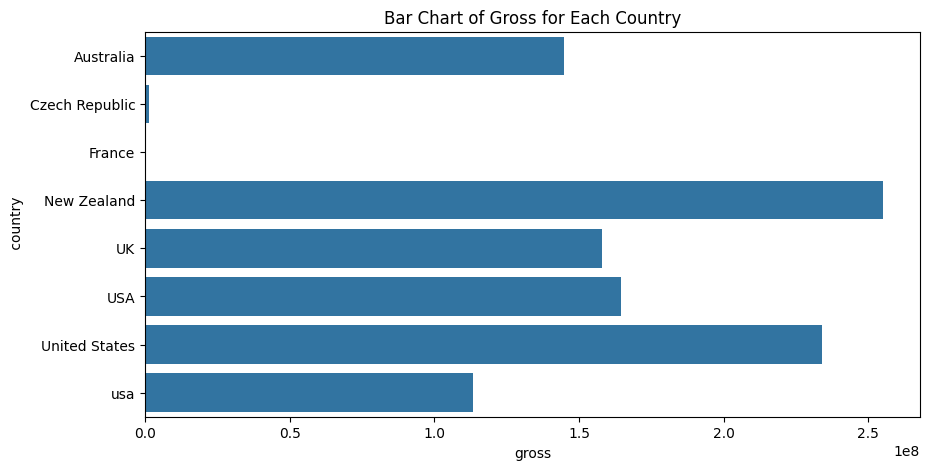

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=movie_gross, x='gross', y='country').set(xlabel='gross', ylabel=' country', title= 'Bar Chart of Gross for Each Country')
plt.show()

In [57]:
movie_gross_sorted = movie_gross.sort_values(by="gross", ascending=False)
sorted_countries = movie_gross_sorted['country'].tolist()
sorted_countries

['New Zealand',
 'United States',
 'USA',
 'UK',
 'Australia',
 'usa',
 'Czech Republic',
 'France']

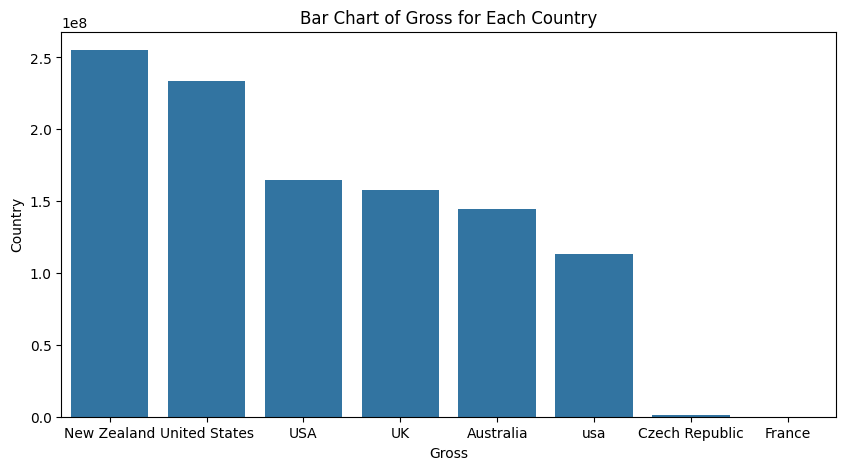

In [59]:
plt.figure(figsize=(10, 5))
sns.barplot(data=movie_gross, y='gross', x='country', order=sorted_countries).set(xlabel='Gross', ylabel='Country', title='Bar Chart of Gross for Each Country')
plt.show()

#### Histogram sederhana
Berbeda dengan barchart tadi, untuk histogram ini tidak perlu dihitung terlebih dahulu.

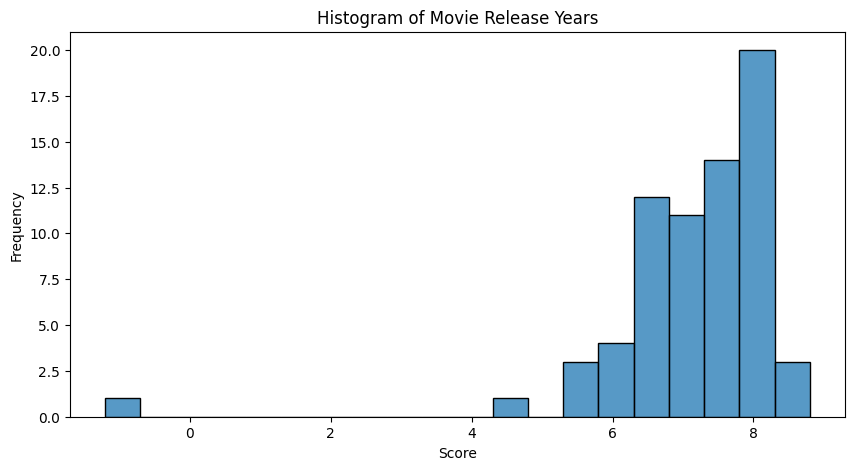

In [67]:
plt.figure(figsize=(10, 5))  # Set the size of the figure
sns.histplot(df['imdb_score'], bins=20, kde=False)  # Create a histogram with 20 bins
plt.xlabel('Score')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.title('Histogram of Score')  # Set the title of the plot
plt.show() 

#### Scatter Plot Sederhana
Untuk scatter plot, kita juga tidak perlu untuk menghitung terlebih dahulu

Text(0, 0.5, 'Movie Facebook Likes')

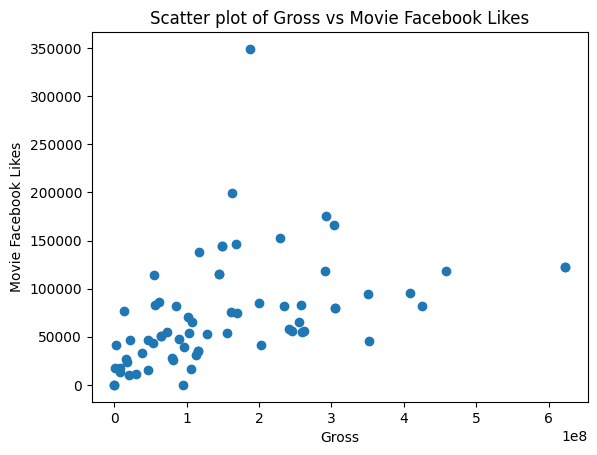

In [77]:
# create a figure and axis
plt.figure(figsize=(10, 5)) 

# scatter the gross against movie facebook likes
plt.scatter(df['gross'], df['movie_facebook_likes'])
# set a title and labels
plt.title('Scatter plot of Gross vs Movie Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('Movie Facebook Likes')

**Menggunakan fig, ax**

Text(0, 0.5, 'Movie Facebook Likes')

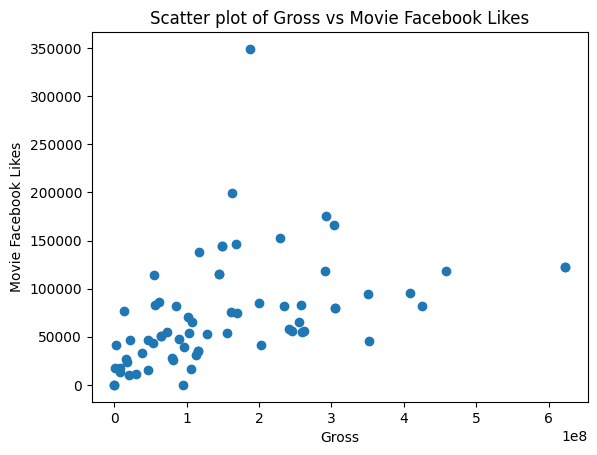

In [78]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the gross against movie facebook likes
ax.scatter(df['gross'], df['movie_facebook_likes'])
# set a title and labels
ax.set_title('Scatter plot of Gross vs Movie Facebook Likes')
ax.set_xlabel('Gross')
ax.set_ylabel('Movie Facebook Likes')

Text(0, 0.5, 'Movie Facebook Likes')

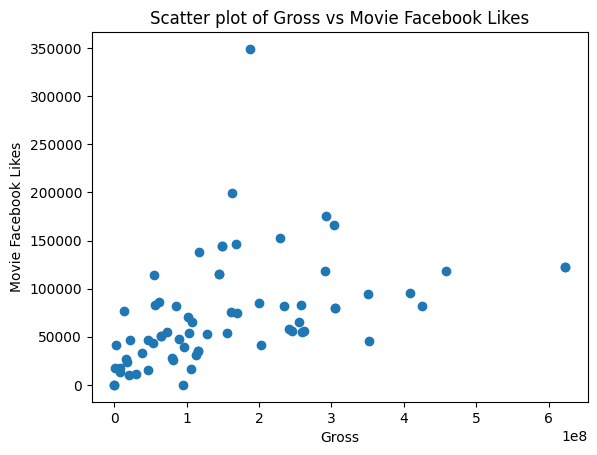

In [86]:
plt.scatter(df['gross'], df['movie_facebook_likes'])
plt.title('Scatter plot of Gross vs Movie Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('Movie Facebook Likes')

**Scatterplot with Hue**

Text(0, 0.5, 'Movie Facebook Likes')

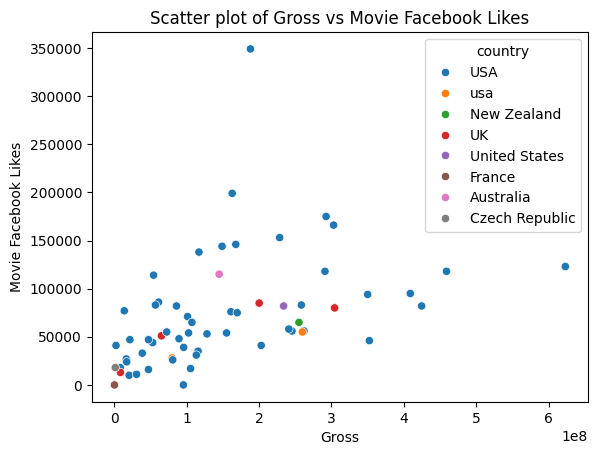

In [83]:

plt.figure
# scatter the gross against movie facebook likes
sns.scatterplot(x = df['gross'], y = df['movie_facebook_likes'], hue=df["country"])
# set a title and labels
plt.title('Scatter plot of Gross vs Movie Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('Movie Facebook Likes')

<Axes: xlabel='gross', ylabel='movie_facebook_likes'>

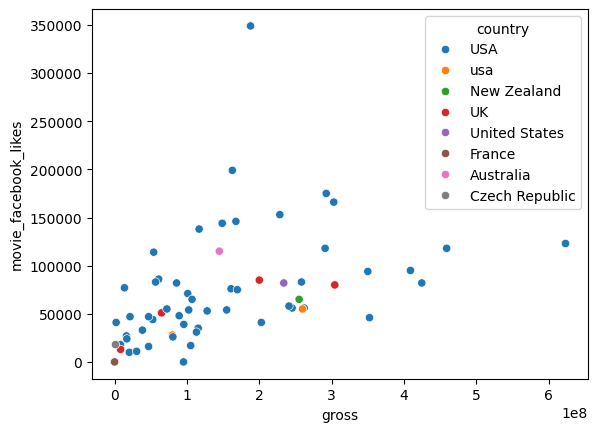

In [84]:
sns.scatterplot(x = df['gross'], y = df['movie_facebook_likes'], hue=df["country"])

#### Membuat Boxplot Sederhana

Text(0, 0.5, 'Gross')

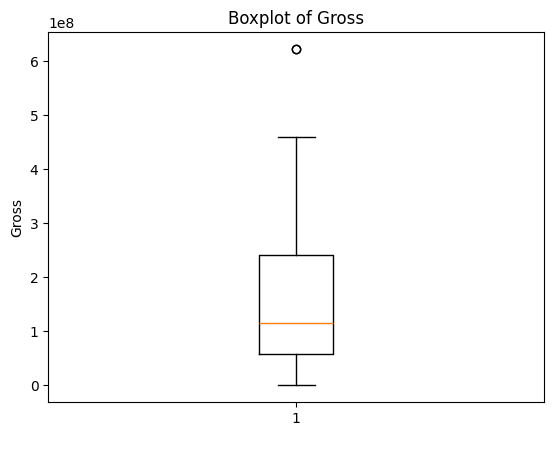

In [81]:
fig, ax = plt.subplots()

# Creating the boxplot
ax.boxplot(df["gross"])

# Setting the title and labels
ax.set_title('Boxplot of Gross')
ax.set_xlabel(' ')
ax.set_ylabel('Gross')
